In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import path

# Preamble


In [2]:
from matplotlib.font_manager import FontProperties

font_path = "../fonts/LinuxLibertine/LinBiolinum_Rah.ttf"
font = FontProperties(fname=font_path)
font.set_size(18)

tick_font = FontProperties(fname=font_path)
tick_font.set_size(15)

# legend_font = FontProperties(fname=font_path)
# legend_font.set_size(12)

import matplotlib.ticker as ticker
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))

In [3]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_theme(style="white")

In [4]:
def img_err(img_hat, img_ref):
    nom = np.sum(np.square(img_hat - img_ref))
    denom = np.sum(np.square(img_ref))
    return nom / denom

# Error Plot

In [5]:
N = 2048
angles = [0, 5, 8, 10, 13, 15, 20, 25]
err_ASASM = []
err_BEASM = []

for theta in angles:

    if not path.exists(f'results-errplot/RS{N,N}-{theta,theta}.png'):
        break
    im_GT = np.array(Image.open(f'results-errplot/RS{N,N}-{theta,theta}.png'))

    if path.exists(f'results-errplot/BEASM{N,N}-{theta,theta}.png'):
        im_BEASM = np.array(Image.open(f'results-errplot/BEASM{N,N}-{theta,theta}.png'))
        err_BEASM.append(img_err(im_BEASM, im_GT))

    if path.exists(f'results-errplot/ASASM{N,N}-{theta,theta}.png'):
        im_ASASM = np.array(Image.open(f'results-errplot/ASASM{N,N}-{theta,theta}.png'))
        err_ASASM.append(img_err(im_ASASM, im_GT))  

err_BEASM = np.array(err_BEASM)
err_ASASM = np.array(err_ASASM)

/home/hywei/anaconda3/envs/sampling/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 640x480 with 0 Axes>

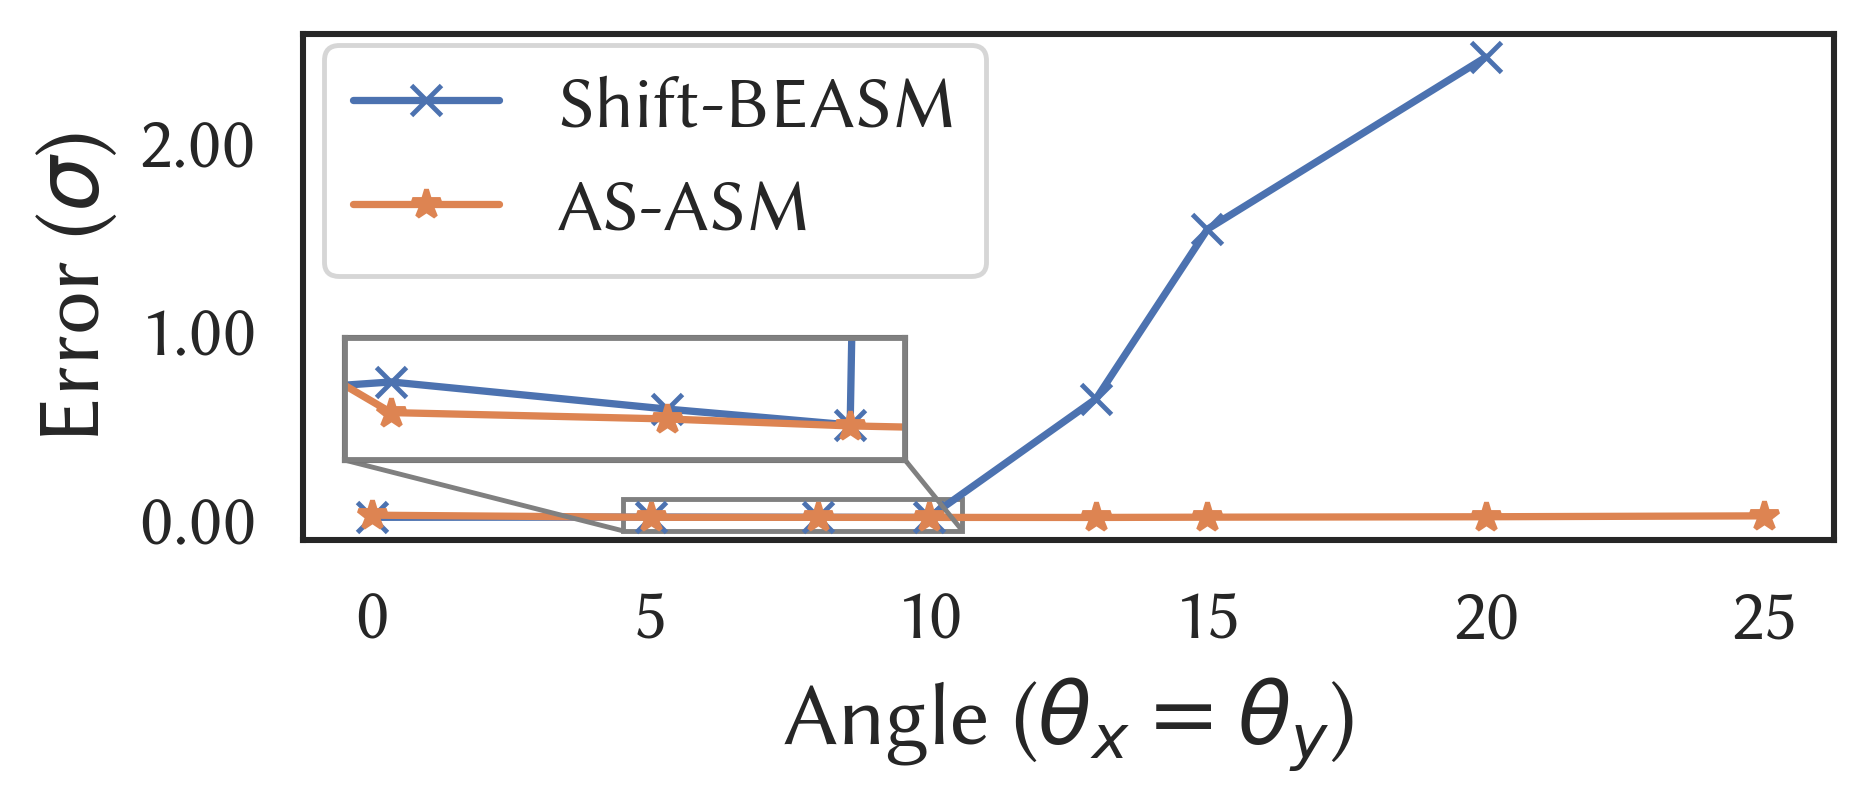

In [8]:
from matplotlib.ticker import FormatStrFormatter
plt.clf()
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
plt.plot(angles[:len(err_BEASM)], err_BEASM, label='Shift-BEASM', marker='x')
plt.plot(angles[:len(err_ASASM)], err_ASASM, label='AS-ASM', marker='*')
plt.legend(prop=tick_font, loc='lower right', bbox_to_anchor=(0.47, 0.45))
plt.xlabel(fr'Angle ($\theta_x = \theta_y$)', fontproperties=font)
plt.ylabel(fr'Error ($\sigma$)', fontproperties=font)
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

axins_dummy = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
axins_dummy.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False )
axins_dummy.set_xlim(4.5, 10.6)
axins_dummy.set_ylim(-0.07, 0.1)

axins = inset_axes(ax, 1.6, 0.35, loc=2, bbox_to_anchor=(0.18, 0.6), bbox_transform=ax.figure.transFigure)
axins.plot(angles[:5], err_BEASM[:5], label='Shift-BEASM', marker='x')
axins.plot(angles[:5], err_ASASM[:5], label='AS-ASM', marker='*')
axins.set_xlim(4.5, 10.6)
axins.set_ylim(-0.0005, 0.0046)
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)
axins.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
# axins.yaxis.set_ticks(np.linspace(0.001, 0.004, 3))
axins.tick_params(axis='both', which='major', labelsize=10)
for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(1.2)
    axins.spines[axis].set_color("gray")

mark_inset(ax, axins_dummy, loc1=3, loc2=4, fc="none", ec="0.5")
fig.tight_layout()
plt.savefig('results-errplot/figure.pdf')

# Expansion $s$ v.s. Error

In [19]:
slist1 = [1, 1.5, 2, 4]
slist2 = [1, 2, 4, 7, 10, 15, 20]
theta = 5
N = 2048
Np = 1024

In [20]:
im_GT = np.array(Image.open(f'results-errplot/RS{N,N}-{theta,theta}.png'))
im_GT_plane = np.array(Image.open(f'results-s/RS{Np,Np}-{theta,theta}.png'))
err_ASASM = []
err_ASASM_plane = []
for s in slist1:
    im_ASASM = np.array(Image.open(f'results-s/ASASM{N,N}-{theta,theta}-{s}.png'))
    err_ASASM.append(img_err(im_ASASM, im_GT))  
for s in slist2:
    im_ASASM_plane = np.array(Image.open(f'results-s/ASASM-plane{Np,Np}-{theta,theta}-{s}.png'))
    err_ASASM_plane.append(img_err(im_ASASM_plane, im_GT_plane))
err_ASASM = np.array(err_ASASM)
err_ASASM_plane = np.array(err_ASASM_plane)

<Figure size 640x480 with 0 Axes>

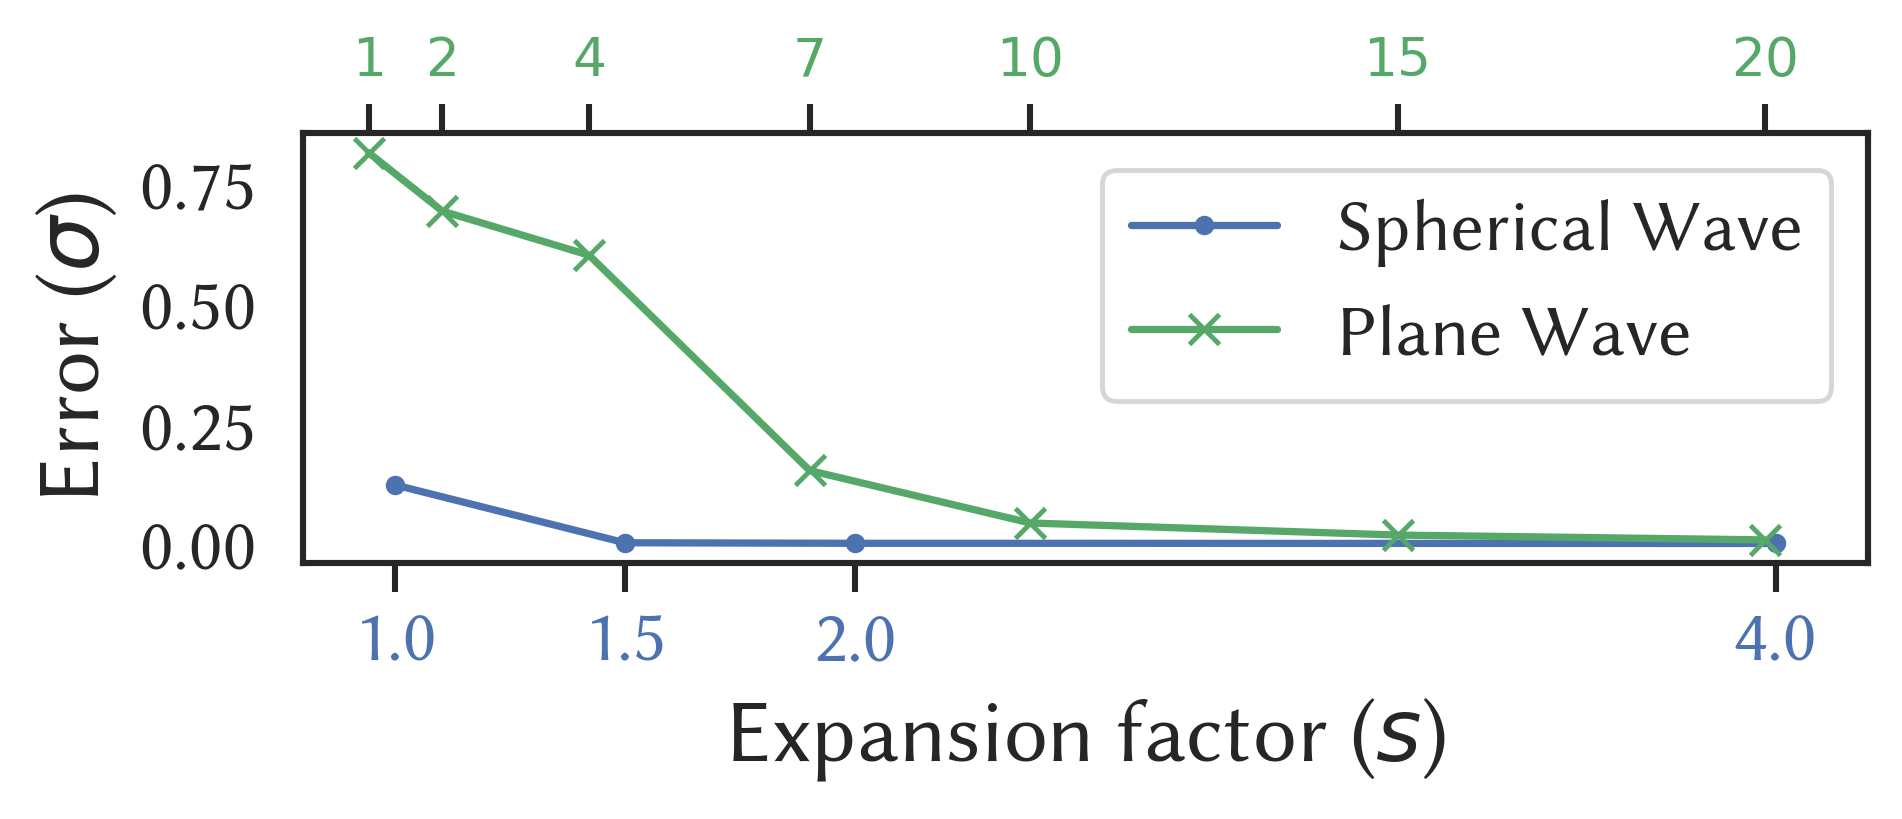

In [21]:
plt.clf()
fig, ax1 = plt.subplots(1, 1, figsize=(5.5, 2.5), dpi=350)
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)
plt.xlabel(fr'Expansion factor ($s$)', fontproperties=font)
plt.ylabel(fr'Error ($\sigma$)', fontproperties=font)

color1 = 'b'
ax1.tick_params(axis='x', labelcolor=color1)
ax1.set_xticks(slist1)
# ax1.set_xticklabels(slist1, fontdict=font)
l1 = ax1.plot(slist1, (err_ASASM), marker='.', label='Spherical Wave', color=color1)
ax1.set_xlim(0.8, 4.2)

ax2 = ax1.twiny()
color2 = 'g'
ax2.tick_params(axis='x', labelcolor=color2)
ax2.set_xticks(slist2)
l2 = ax2.plot(slist2, (err_ASASM_plane), marker='x', label='Plane Wave', color=color2)
ax2.set_xlim(0.1, 21.4)

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, prop=tick_font, loc='upper right')

fig.tight_layout()
plt.savefig('results-s/figure.pdf')

# Results

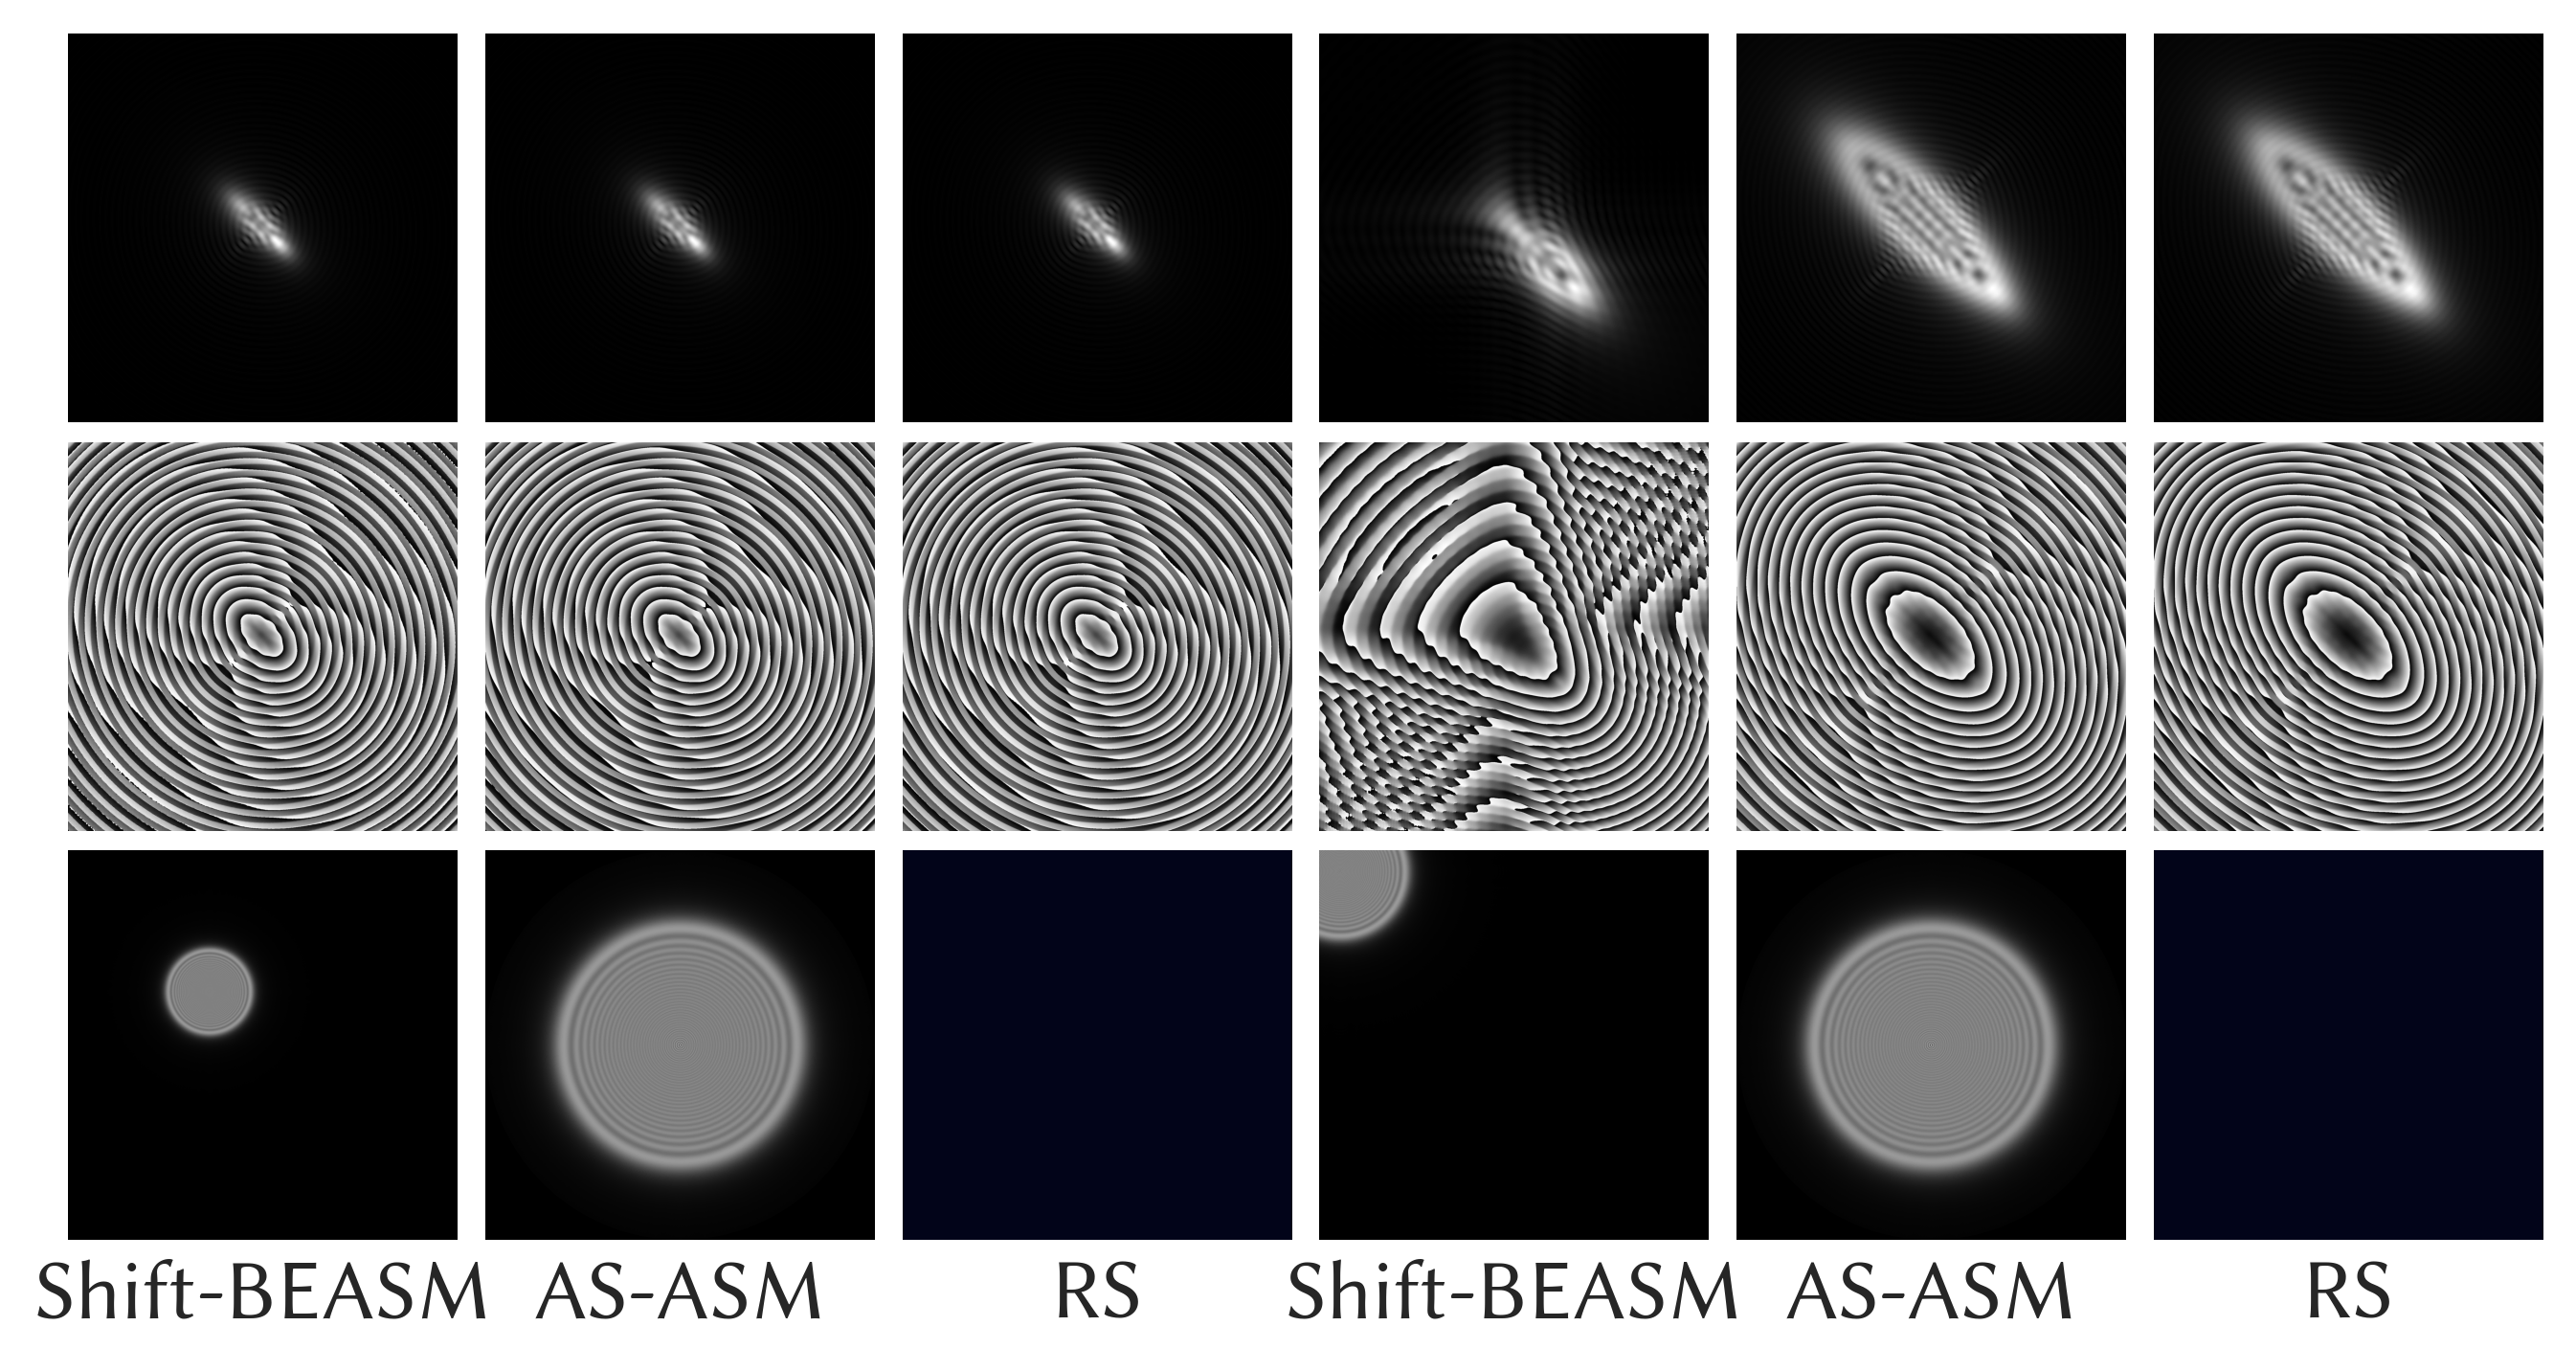

In [10]:
plt.close('all')
N = 2048
fig = plt.figure(figsize=(9.5, 4), dpi=350) # inch, w&h
fig.subplots_adjust(left=0.22, right=1, top=0.9, bottom=0, hspace=0.05, wspace=0.05) 
fig.tight_layout(pad=0)

theta1 = 8
theta2 = 13

figure_list = [
    f'results-visual/BEASM{N,N}-{theta1,theta1}.png', 
    f'results-visual/ASASM{N,N}-{theta1,theta1}.png',
    f'results-visual/RS{N,N}-{theta1,theta1}.png',
    f'results-visual/BEASM{N,N}-{theta2,theta2}.png',
    f'results-visual/ASASM{N,N}-{theta2,theta2}.png',
    f'results-visual/RS{N,N}-{theta2,theta2}.png',

    f'results-visual/BEASM{N,N}-{theta1,theta1}-PhiL.png', 
    f'results-visual/ASASM{N,N}-{theta1,theta1}-PhiL.png',
    f'results-visual/RS{N,N}-{theta1,theta1}-PhiL.png',
    f'results-visual/BEASM{N,N}-{theta2,theta2}-PhiL.png',
    f'results-visual/ASASM{N,N}-{theta2,theta2}-PhiL.png',
    f'results-visual/RS{N,N}-{theta2,theta2}-PhiL.png',

    f'results-visual/BEASM{N,N}-{theta1,theta1}-FU.png', 
    f'results-visual/ASASM{N,N}-{theta1,theta1}-FU.png',
    None,
    f'results-visual/BEASM{N,N}-{theta2,theta2}-FU.png',
    f'results-visual/ASASM{N,N}-{theta2,theta2}-FU.png',
    None
]
xlabel = ['Shift-BEASM', 'AS-ASM', 'RS', 'Shift-BEASM', 'AS-ASM', 'RS']

axes = []
nrow = 3
ncol = 6
for i in range(nrow):
    for j in range(ncol):
        index = i * ncol + j
        ax = fig.add_subplot(nrow, ncol, index+1)

        if figure_list[index] is not None:
            im = np.array(Image.open(figure_list[index]))
            ax.imshow(im, cmap='gray')
        else:
            ax.imshow(np.ones_like(im))

        for key, spine in ax.spines.items():
            spine.set_visible(False)

        if i == nrow - 1: # label in the final row
            ax.set_xlabel(xlabel[j], fontproperties=font)
        # ext.append([ax.get_window_extent().x0, ax.get_window_extent().width])
        axes.append(ax)

# from matplotlib import rc
# rc('text', usetex=True)
# axes[0].set_ylabel(fr'$|u(x,y)|$', fontproperties=font)
# axes[6].set_ylabel(fr'$|\widehat\phi_u(x,y)|$', fontproperties=font)
# axes[12].set_ylabel(fr'$|U(f_X,f_Y)|$', fontproperties=font)

# inv = fig.transFigure.inverted()
# leftw = 1-inv.transform( (axes[0].get_window_extent().x0, 1) )[0]
# plt.figtext(0.43, 0.95, fr"$\theta_x = \theta_y = 8^\circ$", va="center", ha="center", fontproperties=font)
# plt.figtext(0.8, 0.95,  fr"$\theta_x = \theta_y = 13^\circ$", va="center", ha="center", fontproperties=font)

plt.setp(axes, xticks=[], yticks=[])
plt.savefig('results-visual/figure.pdf', bbox_inches = 'tight', pad_inches = 0)

# Angle v.s. Sampling Number/Rate

# Virtual Lens

In [ ]:
import numpy.fft as fft
from ASASM import mdft, midft
import torch

lam = 500e-9
k = 2 * np.pi / lam
z0 = 1.7
f0 = 20e-3 # cannot exceed z0
zf = 1 / (1/f0 - 1/z0)
N = 2048
D = 35e-3 / 16
pitch = D / N
fftmax = 1 / 2 / pitch
x = y = np.linspace(-D/2, D/2, N)
xx, yy = np.meshgrid(x, y, indexing='xy')
fx = np.linspace(-fftmax, fftmax, N)/10
fy = np.linspace(-fftmax, fftmax, N)/10
fxx, fyy = np.meshgrid(fx, fy, indexing='xy')
pupil = np.where(xx**2 + yy**2 <= (D/2)**2, 1, 0)

In [ ]:
# exact input field -> DFT
r0 = np.sqrt(xx**2 + yy**2 + z0**2)
phi_u = k * r0 - k / (2 * f0) * (xx**2 + yy**2)
u = np.exp(1j * phi_u) #* pupil
Fu = mdft(torch.as_tensor(u), torch.as_tensor(x), torch.as_tensor(y), torch.as_tensor(fx).unsqueeze(0), torch.as_tensor(fy).unsqueeze(0))[0]
plt.imshow(np.angle(Fu))
plt.colorbar()

In [ ]:
# VL, no approx.
f = 2002e-3
l1 = f - zf
l2 = 1/(1/f - 1/l1)
print(l1, l2)

c = (f-l2)/f
r = f * np.sqrt((lam*fxx)**2 + (lam*fyy)**2 + ((f-l2)/f)**2)

phi1 = k * r - k*f*c
U1 = 1j * lam * f * np.exp(1j * phi1)
plt.imshow(np.angle(U1))
plt.colorbar()
plt.title(f'f={f}')

In [ ]:
# VL, no approx.
f = 10e-4
l1 = f - zf
l2 = 1/(1/f - 1/l1)
print(l1, l2)

c = (f-l2)/f
r = f * np.sqrt((lam*fxx)**2 + (lam*fyy)**2 + ((f-l2)/f)**2)

phi1 = k * r - k*f*c
U1 = 1j * lam * f * np.exp(1j * phi1)
plt.imshow(np.angle(U1))
plt.colorbar()
plt.title(f'f={f}')

In [ ]:
# bbox = fig.get_window_extent()#.transformed(fig.dpi_scale_trans.inverted())
# # width, height = bbox.width*fig.dpi, bbox.height*fig.dpi
# inv = fig.transFigure.inverted()
# left_center = inv.transform( (bbox.width / 2 , 1) )
# left_center[0]

# FU

In [ ]:
from ASASM import mdft, midft
import torch
from torch.fft import fft2, ifft2, fftshift

In [ ]:
def get_spherical_wave(k, x0, y0, to_xx, to_yy, distance):
    ''' 
    Get the phase shift of the spherical wave from a single point source 
    
    :param x0, y0: spatial coordinate of the source point
    :param to_xx, to_yy: coordinate grid at the destination plane
    :param distance: scalar tensor, travel distance
    :return: the spherical wave at destination
    '''

    radius = np.sqrt(distance**2 + (to_xx - x0)**2 + (to_yy - y0)**2)
    phase = k * radius

    lam = 2 * np.pi / k
    # normalize the total energy of input light to 1
    amplitude = distance / lam / radius
    amplitude /= np.sqrt(np.sum(amplitude**2, axis=(-2,-1), keepdims=True))
    return amplitude * np.exp(1j * phase)

In [ ]:
lam = 500e-9  # wavelength of light in vacuum
k = 2 * np.pi / lam  # wavenumebr
r = 35e-3 / 16 / 2  # radius of aperture
zo = 1.7  # source-aperture distance

# coordinates of aperture
Nx = Ny = 1024
x = np.linspace(-r, r, Nx)
y = np.linspace(-r, r, Ny)
xx, yy = np.meshgrid(x, y, indexing='xy')
pitch = 2 * r / (Nx - 1)

x0 = 0.1
y0 = 0

E0 = torch.tensor(get_spherical_wave(k, 0, 0, xx, yy, zo))
E = torch.tensor(get_spherical_wave(k, x0, y0, xx, yy, zo))
x = torch.tensor(x)
y = torch.tensor(y)

In [ ]:
fftmax = 1 / pitch / 2
dfx = fftmax * 2 / Nx
fx = torch.linspace(-fftmax, fftmax - dfx, Nx, dtype=torch.double).unsqueeze(0)
fy = torch.linspace(-fftmax, fftmax - dfx, Ny, dtype=torch.double).unsqueeze(0)
fxx, fyy = torch.meshgrid(fx[0], fy[0], indexing='xy')

In [ ]:
FU0 = fftshift(fft2(E0))
FU = fftshift(fft2(E))
FU_new = FU0 * torch.exp(1j * x0 * fxx * 2 * torch.pi) * torch.exp(1j * y0 * fyy * 2 * torch.pi)
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(131)
plt.imshow(abs(FU0), cmap='gray')
plt.subplot(132)
plt.imshow(abs(FU), cmap='gray')
plt.subplot(133)
plt.imshow(abs(FU_new), cmap='gray')

In [ ]:
FU0 = mdft(E0, x, y, fx, fy)
FU = mdft(E, x, y, fx, fy)
FU_new = FU0[0] * torch.exp(1j * x0 * fxx * 2 * torch.pi) * torch.exp(1j * y0 * fyy * 2 * torch.pi)
FU_new = FU_new.unsqueeze(0)
Eout0 = midft(FU0, x, y, fx, fy)
Eout = midft(FU, x, y, fx, fy)
Eout_new = midft(FU_new, x, y, fx, fy)

# H sampling

In [ ]:
lam = 500e-9  # wavelength of light in vacuum
k = 2 * np.pi / lam  # wavenumebr
f = 35e-3
r = f / 16 / 2  # radius of aperture
zo = 1.7  # source-aperture distance
z = 1/(1/f - 1/zo)  # aperture-sensor distance, at focal plane

# coordinates of aperture
Nx = Ny = 1024
x = np.linspace(-r, r, Nx)
y = np.linspace(-r, r, Ny)
xx, yy = np.meshgrid(x, y, indexing='xy')
pitch = 2 * r / (Nx - 1)

x0, y0 = 0.1, 0
s0, t0 = -x0 / zo * z, -y0 / zo * z
r0 = np.sqrt(x0**2 + y0**2 + zo**2)
offx, offy = -x0 / r0 / lam, -y0 / r0 / lam

x = torch.tensor(x)
y = torch.tensor(y)

fftmax = 1 / pitch / 2
dfx = fftmax * 2 / Nx
fx = torch.linspace(-fftmax, fftmax - dfx, Nx, dtype=torch.double)
fy = torch.linspace(-fftmax, fftmax - dfx, Ny, dtype=torch.double)

fxs, fys = fx + offx, fy + offy

In [ ]:
# without s0
torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2)))

In [ ]:
# with s0
torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2) - s0))

In [ ]:
# with FU
uc_r10_f = s0 / np.sqrt( s0**2 + t0**2 + (z - z**2/(z+zo))) * f

torch.max(abs(lam * z * fxs / torch.sqrt(1 - (lam*fxs)**2 - (lam*fys)**2) - (s0 - uc_r10_f)))